# IE 360
## HW 2
### Murat Öztürk 2019402093

**Libraries**

In [21]:
library(ggplot2)
library(data.table)
library(forecast)
library(GGally)

**Read Data**

In [2]:
data = data.table(read.csv("IE360_Spring22_HW2_data.csv", colClasses=c("character", rep("numeric",10))))
colnames(data)[c(1,2,4:11)] = c('Time','UGS', 'NLPG', 'PU', 'PG', 'NUGV', 'NDGV', 'GNPA', 'GNPC', 'GNP')
head(data)

Time,UGS,RNUV,NLPG,PU,PG,NUGV,NDGV,GNPA,GNPC,GNP
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000_Q1,1128971,0.0146,940000,469.03,355.69,4647500,281.9853,1040173,3483132,18022686
2000_Q2,1199569,0.0205,941000,459.42,344.58,4742876,284.0813,1760460,4525451,21797130
2000_Q3,1370167,0.0207,943500,439.98,327.21,4840931,286.7169,6974808,5915204,30050207
2000_Q4,1127548,0.0163,948000,402.08,300.67,4919685,288.3137,3267125,4929778,24480153
2001_Q1,1033918,0.0071,950000,411.58,305.75,4954754,287.6237,1004528,3418387,15832648
2001_Q2,1019754,0.0051,955000,520.39,374.78,4980204,287.8814,1449357,4359831,20296918


### 1- Plot and comment

In [3]:
m = data$Time < '2007_Q1'  #Mask to take rows without NA

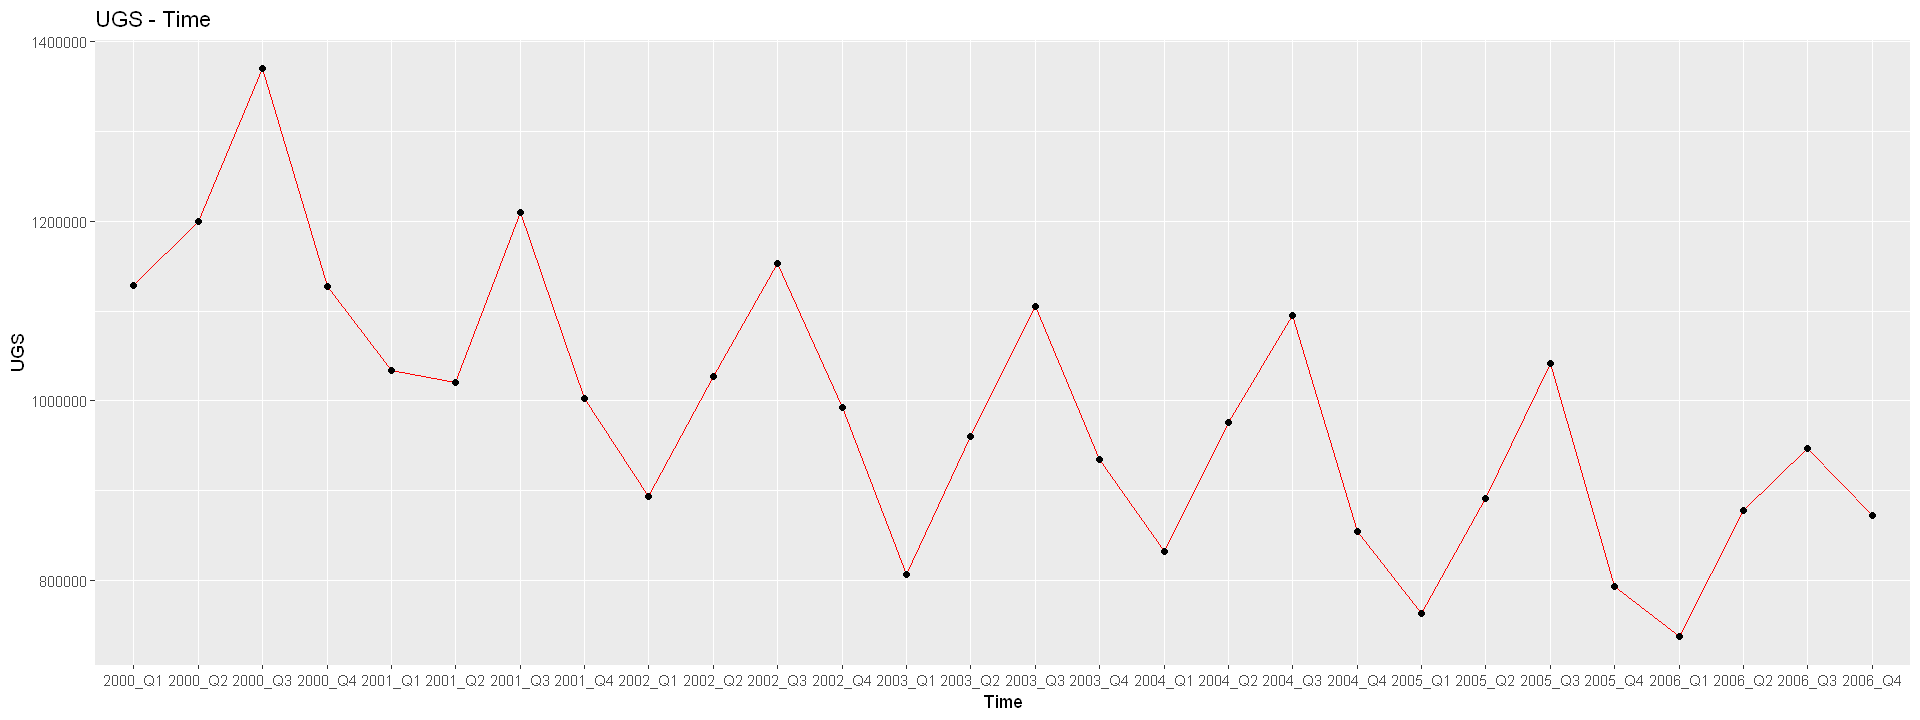

In [23]:
options(repr.plot.width=16, repr.plot.height=6)
ggplot(data[m], aes(x=Time, y=UGS, group=1)) + 
    geom_line(color="red")+
    geom_point()+
    ggtitle('UGS - Time')

The mean doesn't look stationary. Variance seems like its stationary.

### 2- Autocorrelation

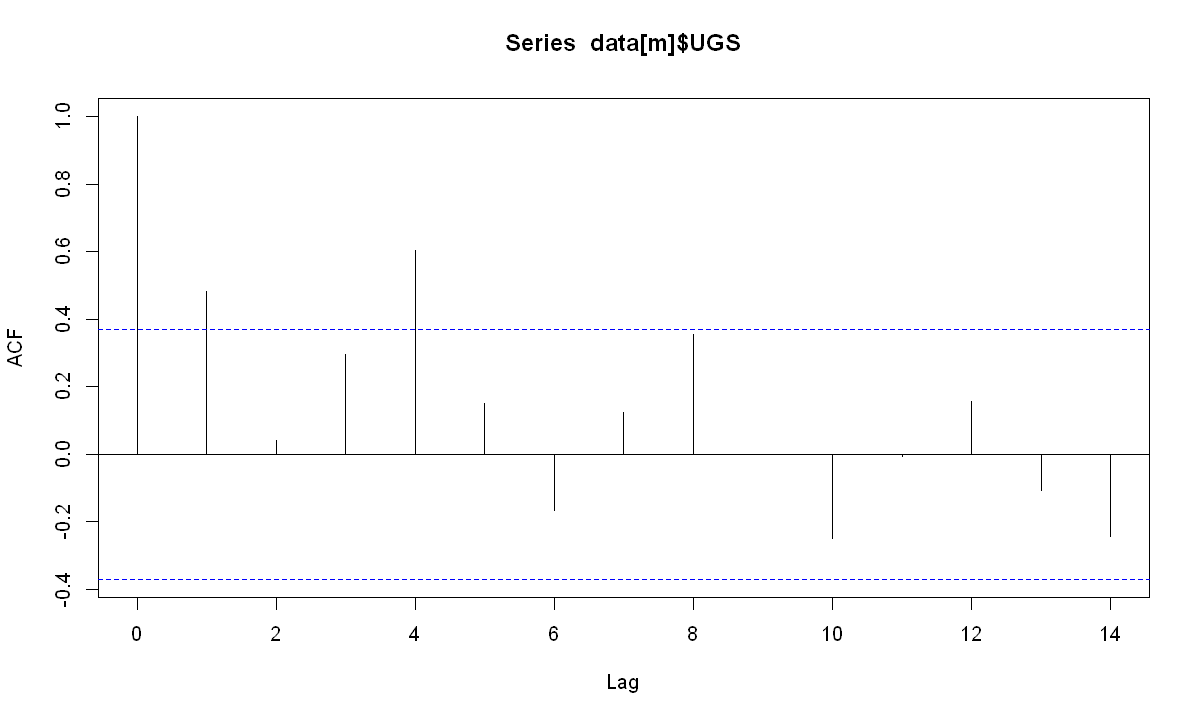

In [5]:
options(repr.plot.width=10, repr.plot.height=6)
acf(data[m]$UGS)

There is a strong autocorrelation at 4 and dereasingly at 8 and 12. There seems to be seasonality.  
Period looks like it is 4 quarters which makes sense since a year has 4 quarters.

### 3- Building model with just UGS and Time

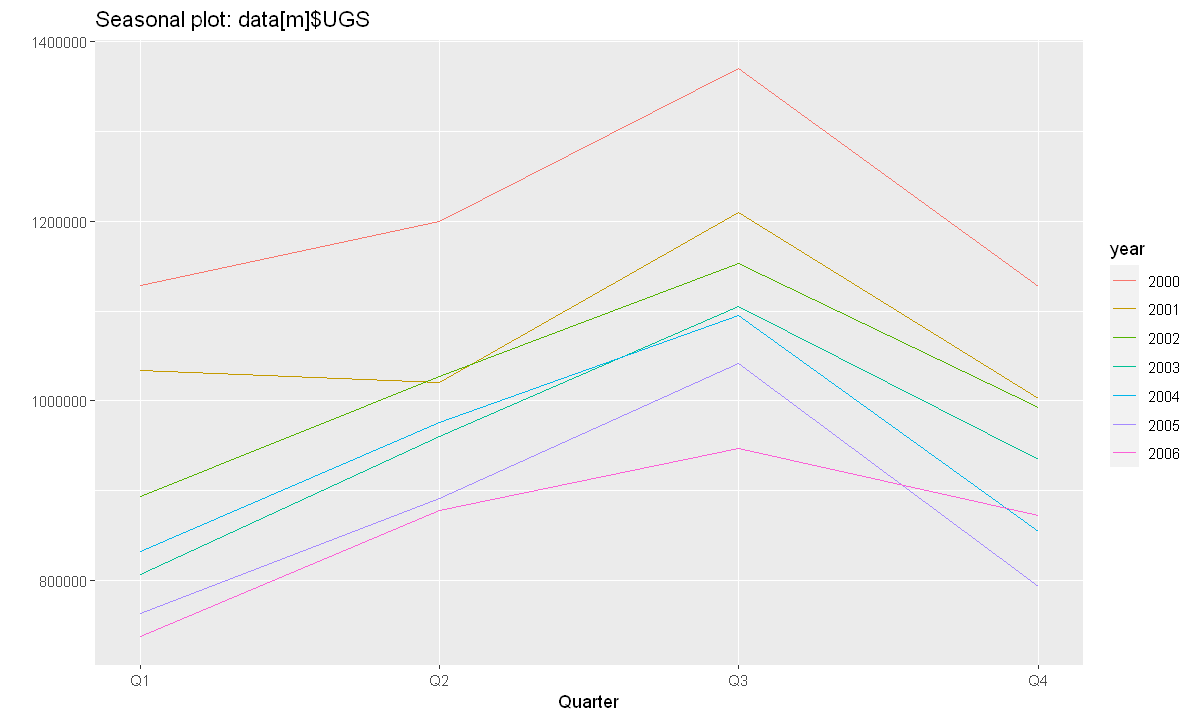

In [6]:
data$UGS = ts(data$UGS, start=c(2000,1),deltat=1/4)
ggseasonplot(data[m]$UGS)
data$UGS = as.numeric(data$UGS)

Seasonality can be observed clearly from this output.

In [7]:
data[, Trend:=1:.N]
data[, Quarter:=as.factor(substr(data$Time, nchar(data$Time), nchar(data$Time)))]
head(data)

Time,UGS,RNUV,NLPG,PU,PG,NUGV,NDGV,GNPA,GNPC,GNP,Trend,Quarter
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
2000_Q1,1128971,0.0146,940000,469.03,355.69,4647500,281.9853,1040173,3483132,18022686,1,1
2000_Q2,1199569,0.0205,941000,459.42,344.58,4742876,284.0813,1760460,4525451,21797130,2,2
2000_Q3,1370167,0.0207,943500,439.98,327.21,4840931,286.7169,6974808,5915204,30050207,3,3
2000_Q4,1127548,0.0163,948000,402.08,300.67,4919685,288.3137,3267125,4929778,24480153,4,4
2001_Q1,1033918,0.0071,950000,411.58,305.75,4954754,287.6237,1004528,3418387,15832648,5,1
2001_Q2,1019754,0.0051,955000,520.39,374.78,4980204,287.8814,1449357,4359831,20296918,6,2


**Linear Regression Models**

##### Trend


Call:
lm(formula = UGS ~ Trend, data = data[m])

Residuals:
    Min      1Q  Median      3Q     Max 
-199945  -73550  -21904   71224  237369 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1170777      43293  27.043  < 2e-16 ***
Trend         -12660       2608  -4.854 4.95e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 111500 on 26 degrees of freedom
Multiple R-squared:  0.4754,	Adjusted R-squared:  0.4552 
F-statistic: 23.56 on 1 and 26 DF,  p-value: 4.945e-05



	Breusch-Godfrey test for serial correlation of order up to 6

data:  Residuals
LM test = 19.942, df = 6, p-value = 0.002836


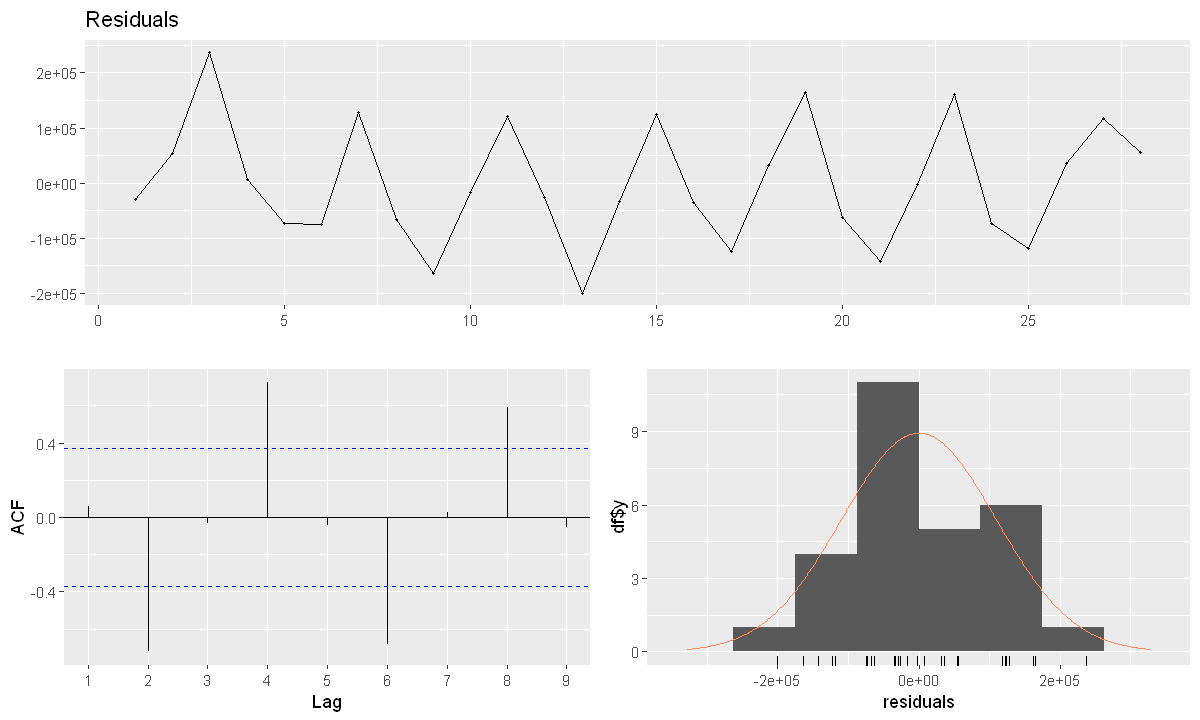

In [8]:
model.t = lm(UGS~Trend, data[m])   #t: Trend
summary(model.t)
checkresiduals(model.t)

Trend predictor has a very small p-value meaning it is a good predictor.  
Seasonality can be observed from the residuals (de-trended UGS).  
##### De-trended acf
Ljung-Box test has low p value.  
Significant autocorreleation at 2,4,6,8.  
At 2, 6 it is negative; at 4,8 it is positive.

##### Trend+Seasonality


Call:
lm(formula = UGS ~ Trend + Quarter, data = data[m])

Residuals:
   Min     1Q Median     3Q    Max 
-81167 -31283  -3458  28640  94502 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1060372      23653  44.830  < 2e-16 ***
Trend         -13497       1147 -11.764 3.28e-11 ***
Quarter2      121532      25987   4.677 0.000104 ***
Quarter3      273619      26063  10.498 3.03e-10 ***
Quarter4       95049      26189   3.629 0.001405 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 48570 on 23 degrees of freedom
Multiple R-squared:  0.9119,	Adjusted R-squared:  0.8966 
F-statistic: 59.53 on 4 and 23 DF,  p-value: 8.446e-12



	Breusch-Godfrey test for serial correlation of order up to 8

data:  Residuals
LM test = 11.462, df = 8, p-value = 0.1769


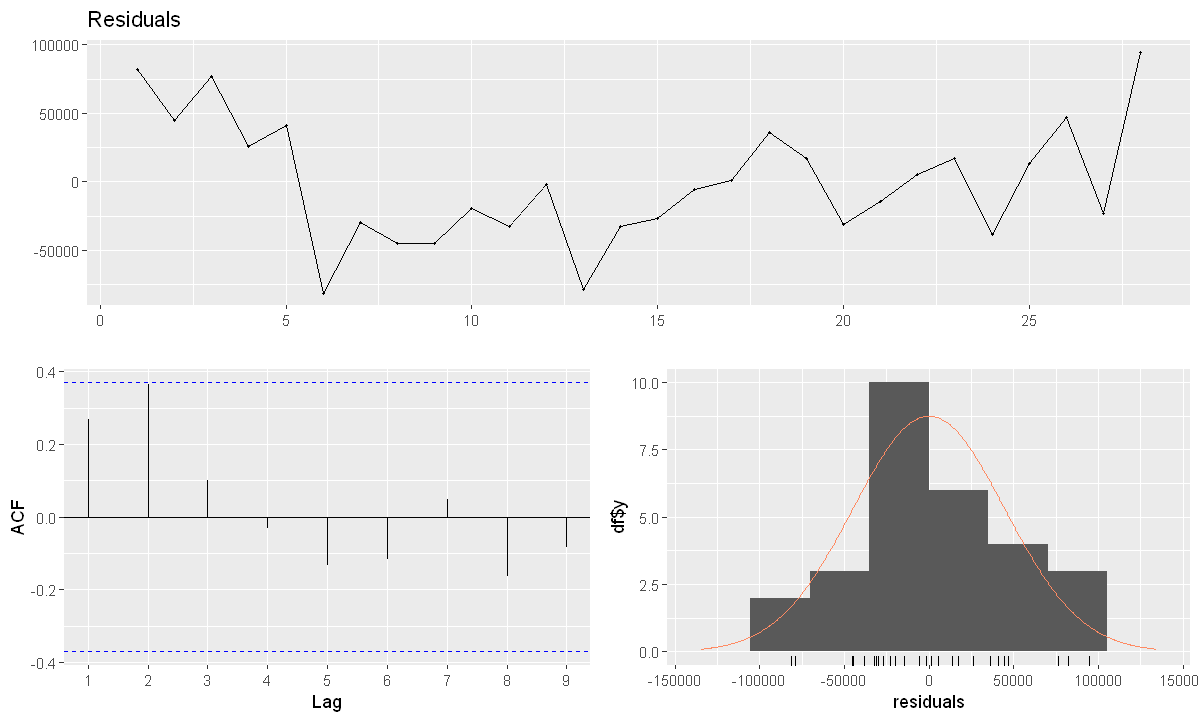

In [9]:
model.tq <- lm(UGS~Trend+Quarter, data[m])   #q: Quarter
summary(model.tq)
checkresiduals(model.tq)

All predictors have significant coefficients (small p-values) which means UGS can really be explained by trend and seasonality.  
One thing to not is that the autocorrelation for data 2 is at the upper limit line.   
Add y(t-2) to see if it will improve the model.

##### Adding Lag 2

In [10]:
data[,UGS_lag2:=c(rep(NA,2),data$UGS[1:(28)], rep(NA,4-2))]
head(data)

Time,UGS,RNUV,NLPG,PU,PG,NUGV,NDGV,GNPA,GNPC,GNP,Trend,Quarter,UGS_lag2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<dbl>
2000_Q1,1128971,0.0146,940000,469.03,355.69,4647500,281.9853,1040173,3483132,18022686,1,1,NA
2000_Q2,1199569,0.0205,941000,459.42,344.58,4742876,284.0813,1760460,4525451,21797130,2,2,NA
2000_Q3,1370167,0.0207,943500,439.98,327.21,4840931,286.7169,6974808,5915204,30050207,3,3,1128971
2000_Q4,1127548,0.0163,948000,402.08,300.67,4919685,288.3137,3267125,4929778,24480153,4,4,1199569
2001_Q1,1033918,0.0071,950000,411.58,305.75,4954754,287.6237,1004528,3418387,15832648,5,1,1370167
2001_Q2,1019754,0.0051,955000,520.39,374.78,4980204,287.8814,1449357,4359831,20296918,6,2,1127548


While including lagged data, linear regression will not be able to use first 2 rows in the data.


Call:
lm(formula = UGS ~ Trend + Quarter + UGS_lag2, data = data[m])

Residuals:
   Min     1Q Median     3Q    Max 
-78490 -25706  10316  20897  55505 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.617e+05  2.673e+05   1.354   0.1910    
Trend       -5.401e+03  2.940e+03  -1.837   0.0811 .  
Quarter2     2.223e+05  4.466e+04   4.977 7.25e-05 ***
Quarter3     4.218e+05  5.814e+04   7.255 5.10e-07 ***
Quarter4     1.828e+05  3.739e+04   4.888 8.90e-05 ***
UGS_lag2     4.848e-01  1.937e-01   2.504   0.0211 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39940 on 20 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.9416,	Adjusted R-squared:  0.9269 
F-statistic: 64.44 on 5 and 20 DF,  p-value: 1.215e-11



	Breusch-Godfrey test for serial correlation of order up to 9

data:  Residuals
LM test = 15.455, df = 9, p-value = 0.07917


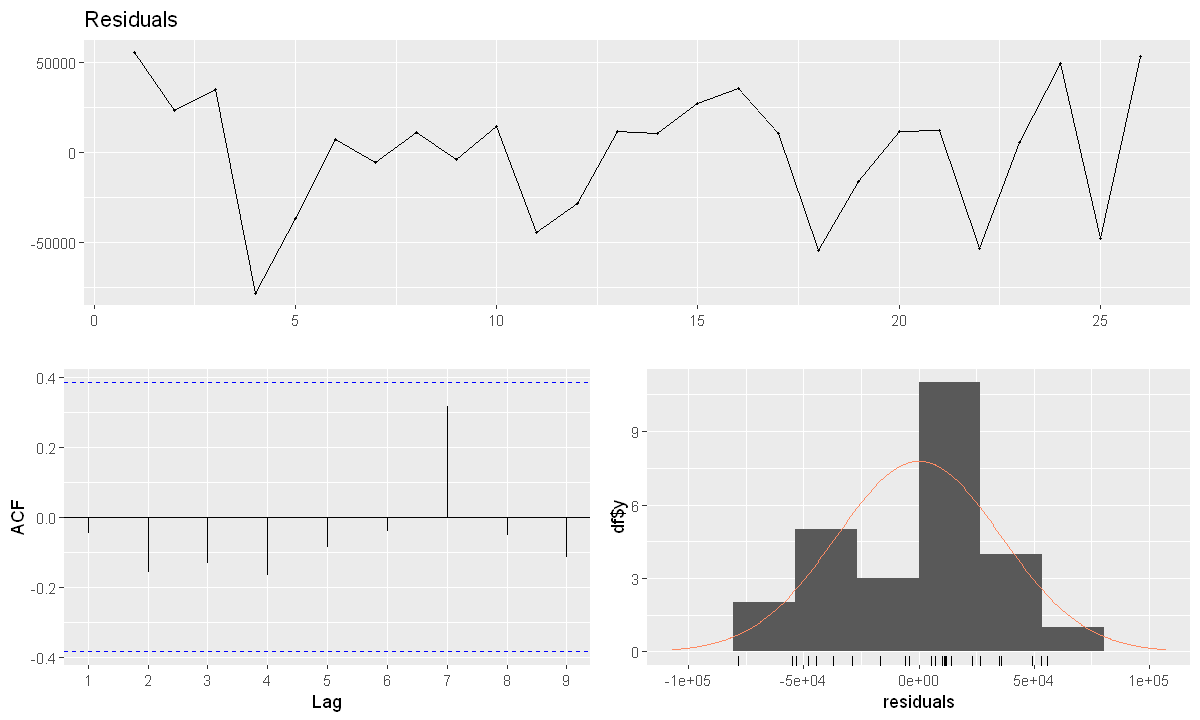

In [11]:
model.tql <- lm(UGS~Trend+Quarter+UGS_lag2, data[m])   #l: lag
summary(model.tql)
checkresiduals(model.tql)

Adding lag increased Radj square and it's p value is significant but now the trend is not as significant as before.  
We might consider using only trend or lag in the following models.

### 4- Other variables, different models

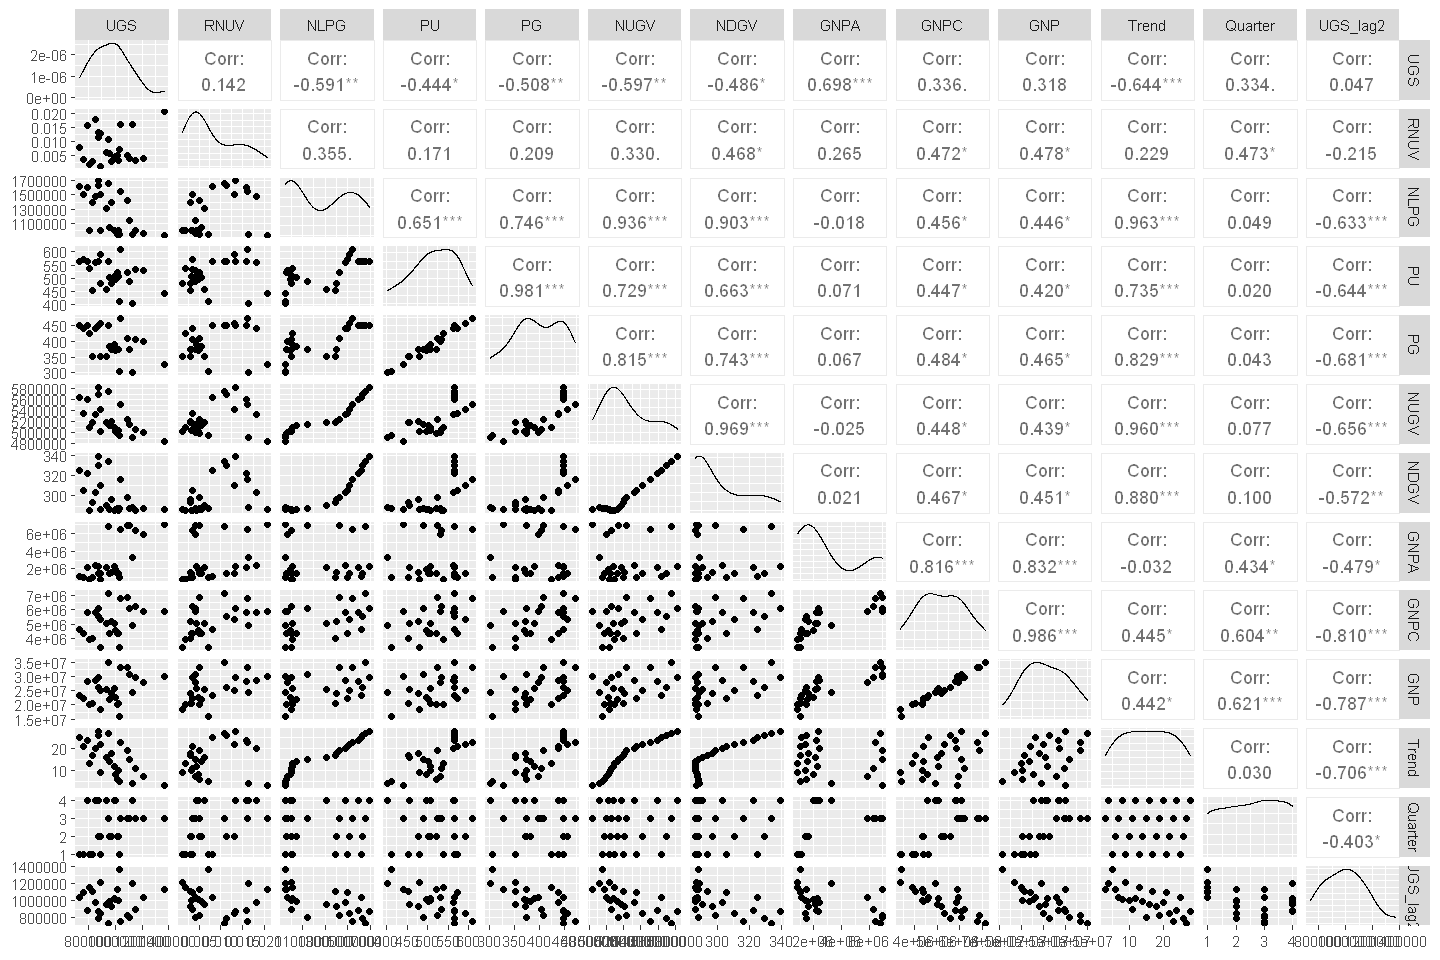

In [12]:
options(repr.plot.width=12, repr.plot.height=8)
data$Quarter = as.numeric(data$Quarter)
ggpairs(data[3:28,2:14])
data$Quarter = as.factor(data$Quarter)

Adding the highest(or lowest) correlation variable with UGS may be good, however it shouldn't have very high correlations with the already added variables.  
To be sure add all of them seperately to see if any increases Radj from 0.9269  
RNUV -> 0.9262  
NLPG -> 0.9301  
PU -> 0.9464  
PG -> 0.9454  
NUGV -> 0.9232  
NDGV -> 0.9257  
GNPA -> 0.9301  
GNPC -> 0.9237  
GNP -> 0.9243  
Add PU since it is the highest Radj: 0.9464  
PG would have been also very good since PG and PU have correlation of 0.98


Call:
lm(formula = UGS ~ Trend + Quarter + UGS_lag2 + PU, data = data[m])

Residuals:
   Min     1Q Median     3Q    Max 
-61183 -18461   1605  19631  52416 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.559e+05  2.509e+05   2.614  0.01705 *  
Trend       -3.019e+03  2.652e+03  -1.138  0.26908    
Quarter2     2.248e+05  3.828e+04   5.874 1.17e-05 ***
Quarter3     4.240e+05  4.982e+04   8.511 6.60e-08 ***
Quarter4     1.760e+05  3.213e+04   5.478 2.76e-05 ***
UGS_lag2     4.445e-01  1.665e-01   2.669  0.01517 *  
PU          -5.624e+02  1.959e+02  -2.871  0.00979 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 34220 on 19 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.9592,	Adjusted R-squared:  0.9464 
F-statistic: 74.52 on 6 and 19 DF,  p-value: 3.513e-12



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 7.5069, df = 10, p-value = 0.6769


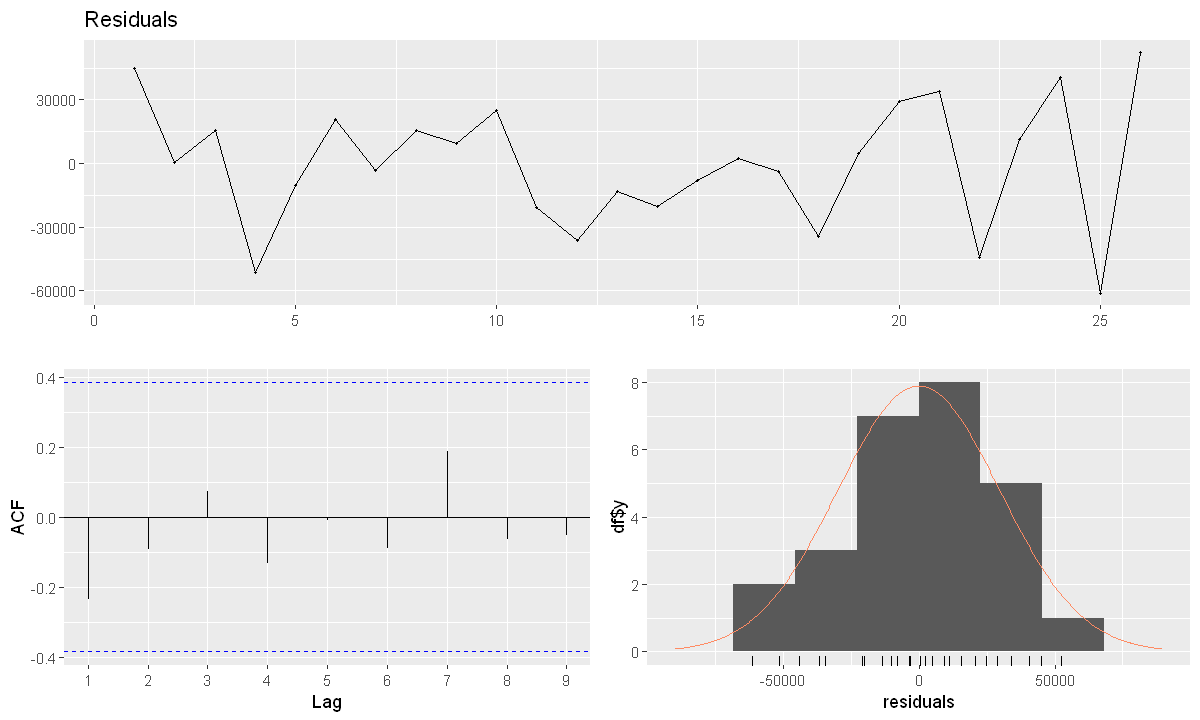

In [13]:
options(repr.plot.width=10, repr.plot.height=6)
model.add1 <- lm(UGS~Trend+Quarter+UGS_lag2+PU, data[m])
summary(model.add1)
checkresiduals(model.add1)

The p values are significant except trend predictor.  
The residuals look great, meaning it looks random, normally distributed and there doesn't seem to be any significant autocorrelation.

Removing LAG2 -> 0.9062 Radj  
Removing Trend -> 0.9456 Radj


Call:
lm(formula = UGS ~ Quarter + UGS_lag2 + PU, data = data[m])

Residuals:
   Min     1Q Median     3Q    Max 
-70633 -10616   -390  29231  39933 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.567e+05  1.811e+05   2.522  0.02026 *  
Quarter2     2.579e+05  2.510e+04  10.274 2.01e-09 ***
Quarter3     4.708e+05  2.836e+04  16.601 3.66e-13 ***
Quarter4     2.008e+05  2.375e+04   8.455 4.91e-08 ***
UGS_lag2     6.071e-01  8.616e-02   7.047 7.81e-07 ***
PU          -6.322e+02  1.875e+02  -3.372  0.00303 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 34480 on 20 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.9565,	Adjusted R-squared:  0.9456 
F-statistic: 87.86 on 5 and 20 DF,  p-value: 6.542e-13



	Breusch-Godfrey test for serial correlation of order up to 9

data:  Residuals
LM test = 8.6494, df = 9, p-value = 0.4702


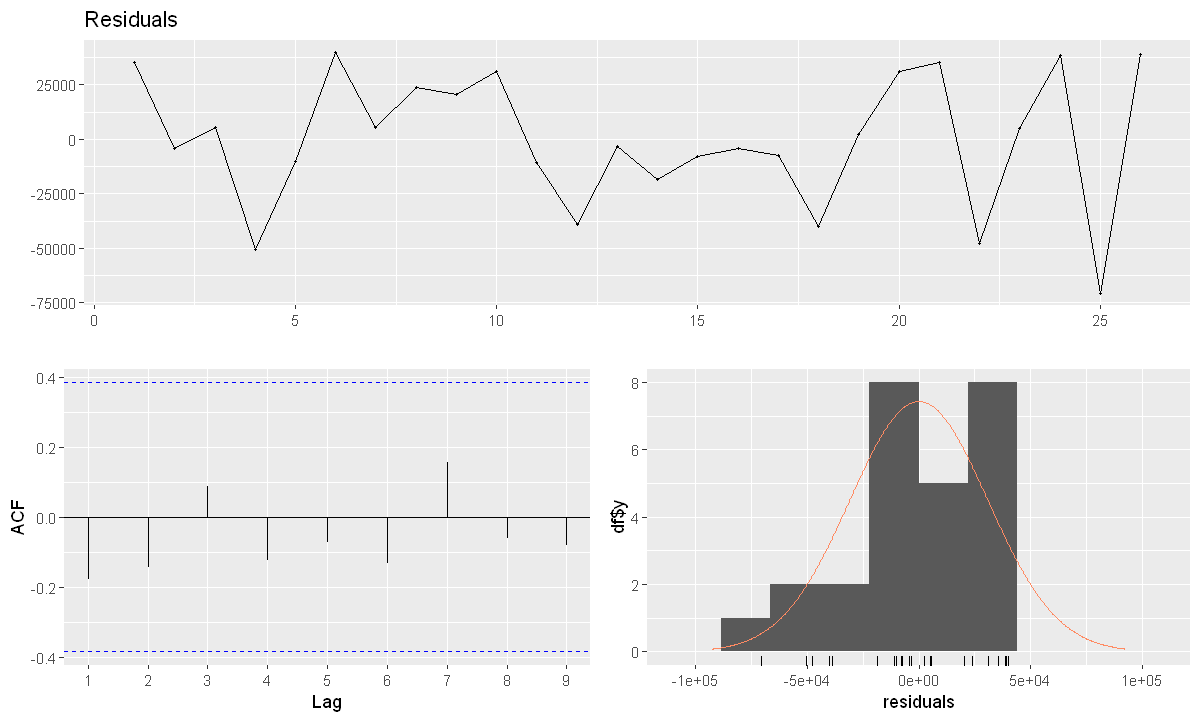

In [14]:
model.remove1 <- lm(UGS~Quarter+UGS_lag2+PU, data[m])
summary(model.remove1)
checkresiduals(model.remove1)

Getting rid of a trend didn't reduce Radj, but now the residual histrogram isn't looking as good.

Many different models can be evaluated however this process gets exponentially complex as predictors increase.  

### 5- Final Model

I will proceed with model.add1

In [15]:
model.final = model.add1
summary(model.final)


Call:
lm(formula = UGS ~ Trend + Quarter + UGS_lag2 + PU, data = data[m])

Residuals:
   Min     1Q Median     3Q    Max 
-61183 -18461   1605  19631  52416 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.559e+05  2.509e+05   2.614  0.01705 *  
Trend       -3.019e+03  2.652e+03  -1.138  0.26908    
Quarter2     2.248e+05  3.828e+04   5.874 1.17e-05 ***
Quarter3     4.240e+05  4.982e+04   8.511 6.60e-08 ***
Quarter4     1.760e+05  3.213e+04   5.478 2.76e-05 ***
UGS_lag2     4.445e-01  1.665e-01   2.669  0.01517 *  
PU          -5.624e+02  1.959e+02  -2.871  0.00979 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 34220 on 19 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.9592,	Adjusted R-squared:  0.9464 
F-statistic: 74.52 on 6 and 19 DF,  p-value: 3.513e-12


All predictors have significant p values except Trend.  
Since Trend doesn't have a significat value it may be discarded but when it is discarded the  
residuals are shifted to the left and then the model has residuals skewed to the right.  
Considering both factors, I've decided to go with the model that has better distributed(normally) residuals.  
The model over all (F-statistic) has a significant p value.  
Absolute value of residual 1Q and 3Q are close to each other. Min max are also close to each other.  
Adjusted R-squared value is 0.9464


	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 7.5069, df = 10, p-value = 0.6769


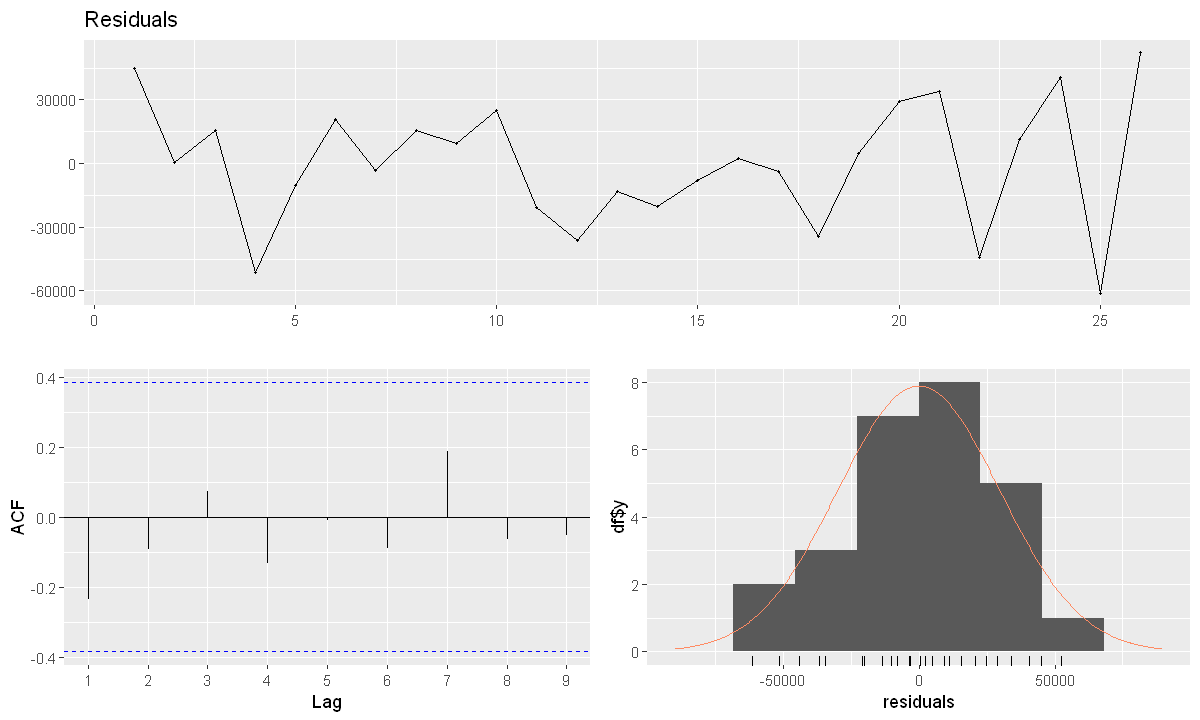

In [16]:
checkresiduals(model.final)

Ljung Box test has high p value.  
We can not say the autocorrelation isn't random.  
Residual histogram fits to the normal distribution to some level.

### 6- Predictions

In [17]:
X = data[,c(12,13,14,5)] #Input, UGS_lag uses real values till 30, uses predicted later on
y = data.table(cbind(Trend=1:32,UGS_Predicted=c(rep(NA,2),model.final$fitted.values,rep(0,4)))) #Predicted
tail(X)

Trend,Quarter,UGS_lag2,PU
<int>,<fct>,<dbl>,<dbl>
27,3,736580,565.19
28,4,877614,565.19
29,1,946783,565.19
30,2,872000,565.19
31,3,NA,565.19
32,4,NA,565.19


In [18]:
#Use the values predicted as lagged values to predict next values
#Q1
X[31,3] = y[29,2] = predict(model.final, X[29,]) 
#Q2
X[32,3] = y[30,2] = predict(model.final, X[30,])
#Q3
y[31,2] = predict(model.final, X[31,])
#Q4
y[32,2] = predict(model.final, X[32,])

In [19]:
#Forecasted unleaded gasoline sales for 2007
y[29:32]

Trend,UGS_Predicted
<dbl>,<dbl>
29,671312.0
30,859897.9
31,966879.4
32,799632.5


In [24]:
data.plot = cbind(Time=data$Time,y,UGS=data$UGS)
head(data.plot,3)

Time,Trend,UGS_Predicted,UGS
<chr>,<dbl>,<dbl>,<dbl>
2000_Q1,1,NA,1128971
2000_Q2,2,NA,1199569
2000_Q3,3,1325256,1370167


Warning message:
"Removed 4 row(s) containing missing values (geom_path)."
Warning message:
"Removed 2 row(s) containing missing values (geom_path)."


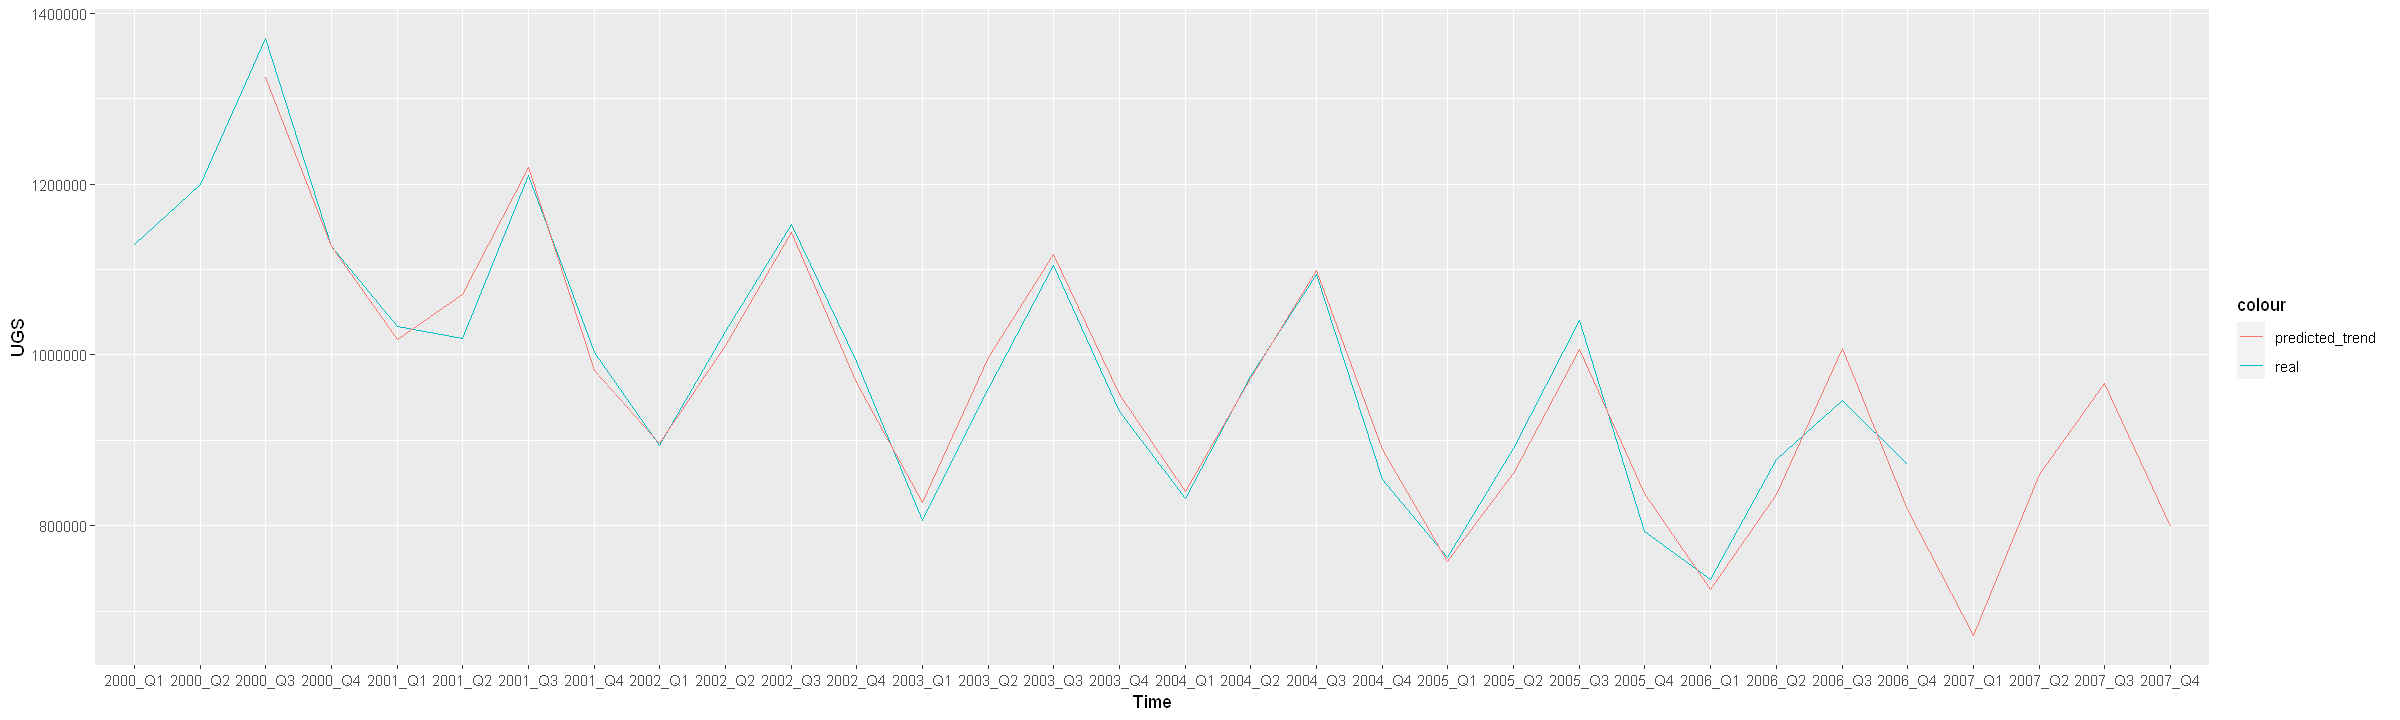

In [30]:
options(repr.plot.width=20, repr.plot.height=6)
ggplot(data.plot ,aes(x=Time, group=1)) +
        geom_line(aes(y=UGS,color='real')) + 
        geom_line(aes(y=UGS_Predicted,color='predicted_trend'))